In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
a=pd.read_csv('/content/Wine.csv')
print(a)
X= a.drop("Customer_Segment",axis=1)
y=a["Customer_Segment"]
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

svm_original = SVC()
svm_original.fit(X_train, y_train)

y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy before PCA:", accuracy_original)

n_components=3
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

svm_reduced = SVC()
svm_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = svm_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print("Accuracy after PCA:", accuracy_reduced)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
a=pd.read_csv('/content/breast_cancer_survival.csv')
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

Logistic Regression Accuracy: 0.7142857142857143
SVM Accuracy: 0.7142857142857143


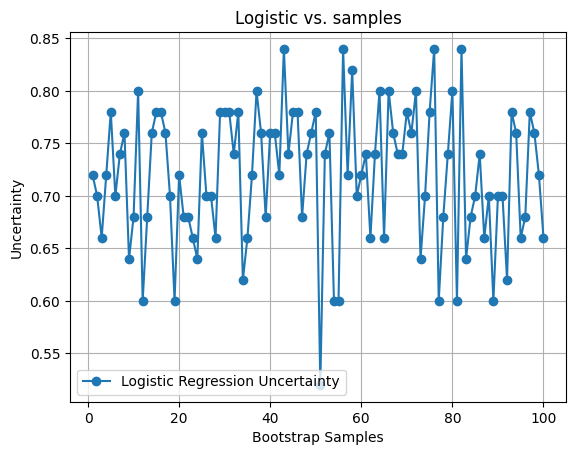

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv('/content/breast_cancer_survival.csv')



drop_columns = ["Gender", "Histology", "ER status", "PR status", "Surgery_type", "Date_of_Surgery", "Date_of_Last_Visit"]
data = data.drop(columns=drop_columns)



data['modified_Tumour_Stage'] = data['Tumour_Stage'].map({'I': 1, 'II': 2}).fillna(3)
data['mod_Patient_Status'] = (data['Patient_Status'] == 'Alive').astype(int)
data['modified_HER2_status'] = (data['HER2 status'] == 'Positive').astype(int)



X = data.drop(['Tumour_Stage', 'Patient_Status', 'mod_Patient_Status', 'HER2 status'], axis=1)
y = data['mod_Patient_Status']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)



logistic_model = LogisticRegression().fit(X_train, y_train)
svm_model = SVC().fit(X_train, y_train)



accuracy_logistic = accuracy_score(y_test, logistic_model.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))



print("Logistic Regression Accuracy:", accuracy_logistic)
print("SVM Accuracy:", accuracy_svm)


n_bootstraps = 100
sample_sizes = range(1, 51)


logistic_uncertainty = []
svm_uncertainty = []

for size in sample_sizes:
    logistic_bootstrap_uncertainty = []
    svm_bootstrap_uncertainty = []
    for _ in range(n_bootstraps):

        bootstrap_indices = np.random.choice(len(y_test), size, replace=True)
        X_bootstrap = X_test.iloc[bootstrap_indices]
        y_bootstrap = y_test.iloc[bootstrap_indices]


        logistic_pred = logistic_model.predict(X_bootstrap)
        svm_pred = svm_model.predict(X_bootstrap)


        logistic_accuracy = accuracy_score(y_bootstrap, logistic_pred)
        svm_accuracy = accuracy_score(y_bootstrap, svm_pred)

        logistic_bootstrap_uncertainty.append(logistic_accuracy)
        svm_bootstrap_uncertainty.append(svm_accuracy)

sample_indices = range(1, n_bootstraps + 1)


plt.plot(sample_indices, logistic_bootstrap_uncertainty, label='Logistic Regression Uncertainty', marker='o')

plt.xlabel('Bootstrap Samples')
plt.ylabel('Uncertainty')
plt.title('Logistic vs. samples')
plt.legend()
plt.grid(True)

plt.show()